In [1]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
# unzip a file
# !unzip /content/gdrive/MyDrive/ML/ML_PROJECTS/Mask_identifiction/archive.zip -d /content/gdrive/MyDrive/ML/ML_PROJECTS/Mask_identifiction

In [4]:
# Part 1 - Building the CNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.models import model_from_json
from io import StringIO
import os

In [5]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
from PIL import Image,ImageFile
import warnings #To handle Warning
warnings.filterwarnings("ignore")

ImageFile.LOAD_TRUNCATED_IMAGES = True
batch_size = 32

from tensorflow.keras.preprocessing.image import ImageDataGenerator


fpath = "/content/gdrive/MyDrive/ML/ML_PROJECTS/Mask_identifiction/Face Mask Dataset/Train"
cate = os.listdir(fpath)
print("List of categories = ",cate,"\n\nNo. of categories = ", len(cate))
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/content/gdrive/MyDrive/ML/ML_PROJECTS/Mask_identifiction/Face Mask Dataset/Train',  # This is the source directory for training images
        target_size=(200, 200),  # All images will be resized to 200 x 200
        batch_size=batch_size,

        # Specify the classes explicitly
        
       
        classes =  cate,
        # Since we use categorical_crossentropy loss, we need categorical labels
        class_mode='categorical')

List of categories =  ['WithMask', 'WithoutMask'] 

No. of categories =  2
Found 10000 images belonging to 2 classes.


In [10]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 200x 200 with 3 bytes color
    # The first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a dense layer
    tf.keras.layers.Flatten(),
    # 128 neuron in the fully-connected layer
    tf.keras.layers.Dense(128, activation='relu'),
    # 5 output neurons for 5 classes with the softmax activation
    tf.keras.layers.Dense(2, activation='softmax')
])

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 99, 99, 16)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 97, 97, 32)        4640      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 48, 48, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 46, 46, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 23, 23, 64)      

In [11]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['acc'])

total_sample=train_generator.n

n_epochs = 30


In [12]:
ImageFile.LOAD_TRUNCATED_IMAGES = True
history = model.fit(
        train_generator, 
        steps_per_epoch=int(total_sample/batch_size),  
        epochs=n_epochs,
        verbose=1)

Epoch 1/30
312/312 [==============================] - 36s 108ms/step - loss: 0.2178 - acc: 0.9150
Epoch 2/30
312/312 [==============================] - 33s 106ms/step - loss: 0.0723 - acc: 0.9768
Epoch 3/30
312/312 [==============================] - 33s 106ms/step - loss: 0.0536 - acc: 0.9824
Epoch 4/30
312/312 [==============================] - 34s 108ms/step - loss: 0.0415 - acc: 0.9864
Epoch 5/30
312/312 [==============================] - 33s 105ms/step - loss: 0.0347 - acc: 0.9896
Epoch 6/30
312/312 [==============================] - 33s 105ms/step - loss: 0.0280 - acc: 0.9904
Epoch 7/30
312/312 [==============================] - 33s 105ms/step - loss: 0.0245 - acc: 0.9917
Epoch 8/30
312/312 [==============================] - 33s 105ms/step - loss: 0.0251 - acc: 0.9927
Epoch 9/30
312/312 [==============================] - 33s 105ms/step - loss: 0.0215 - acc: 0.9937
Epoch 10/30
312/312 [==============================] - 32s 104ms/step - loss: 0.0228 - acc: 0.9947
Epoch 11/30
312/312

In [13]:
model.save('new_model.h5')

In [14]:
model.save('/content/gdrive/MyDrive/ML/ML_PROJECTS/Mask_identifiction/new_model.h5')


In [29]:
url = '/content/gdrive/MyDrive/ML/ML_PROJECTS/Mask_identifiction/Face Mask Dataset/Test/WithMask/1404.png'

In [30]:
import tensorflow as tf
import cv2
import numpy as np
from PIL import Image
from keras.models import load_model

# model = tf.keras.models.load_model(r'models.h5')
model = load_model('/content/gdrive/MyDrive/ML/ML_PROJECTS/Mask_identifiction/new_model.h5')

import numpy as np
from keras.preprocessing import image
from PIL import Image
import requests
from io import BytesIO

# response = requests.get(url)
# test_image = Image.open(BytesIO(response.content))
test_image = Image.open(url)
# test_image = image.load_img(path, target_size = (200,200))
#test_image = image.img_to_array(test_image)
test_image =test_image.resize((200,200),Image.ANTIALIAS)
test_image = np.expand_dims(test_image, axis=0)
result = model.predict(test_image)
print()

classes = ['WithMask', 'WithoutMask'] 


for i in range(2):
  if result[0][i]==1:
    print(classes[i])




WithMask


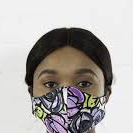

In [33]:
from IPython.display import display, Image
display(Image(filename=url))